### Importing necessary libraries

In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

### Question 1: Lenna's Plight


In [37]:
def quantize_images(image, bit_levels):
    bit_levels = np.array(bit_levels)
    levels = 2 ** bit_levels[:, None, None, None] 
    quantized_images = np.floor(image * levels) / levels 
    return quantized_images

img = cv2.imread('src_img/Lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
img = np.array(img, dtype=np.float64) / 255  

bit_levels = [1, 2, 3, 4, 5, 6, 7, 8]
quantized_images = quantize_images(img, bit_levels)

output_dir = 'out_img/q1'
os.makedirs(output_dir, exist_ok=True)

images = [img] + list(quantized_images)
titles = ["Original Image"] + [f"{bit_levels[i-1]}-bit Quantization" for i in range(1, len(bit_levels) + 1)]

for i, (image, title) in enumerate(zip(images, titles)):
    image_to_save = (image * 255).astype(np.uint8)
    filename = os.path.join(output_dir, f'{title}.png')
    cv2.imwrite(filename, cv2.cvtColor(image_to_save, cv2.COLOR_RGB2BGR))

print("Images saved successfully.")


Images saved successfully.


**Quantization**: In sampling, we digitize our x and y coordinates, and similarly in quantization we digitize our amplitude levels of the image. This changes the number of colors involved in the image, if more bits involved, then that would mean more number of colors and inverse for less number of bits. Improving quantization improves the number of intensity levels involved in the image and hence improves the memory usage.

### Question 2: Sorry, this is a long one : (

**Task 1** : histequalize()

In [8]:
def histequalize(channel):
    flat_image = channel.flatten()
    hist, bins = np.histogram(flat_image, 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    equalized_channel = cdf_normalized[channel].astype(np.uint8)
    return equalized_channel

**Task 2** : Plotting Images, their Histograms and their equalized Histograms

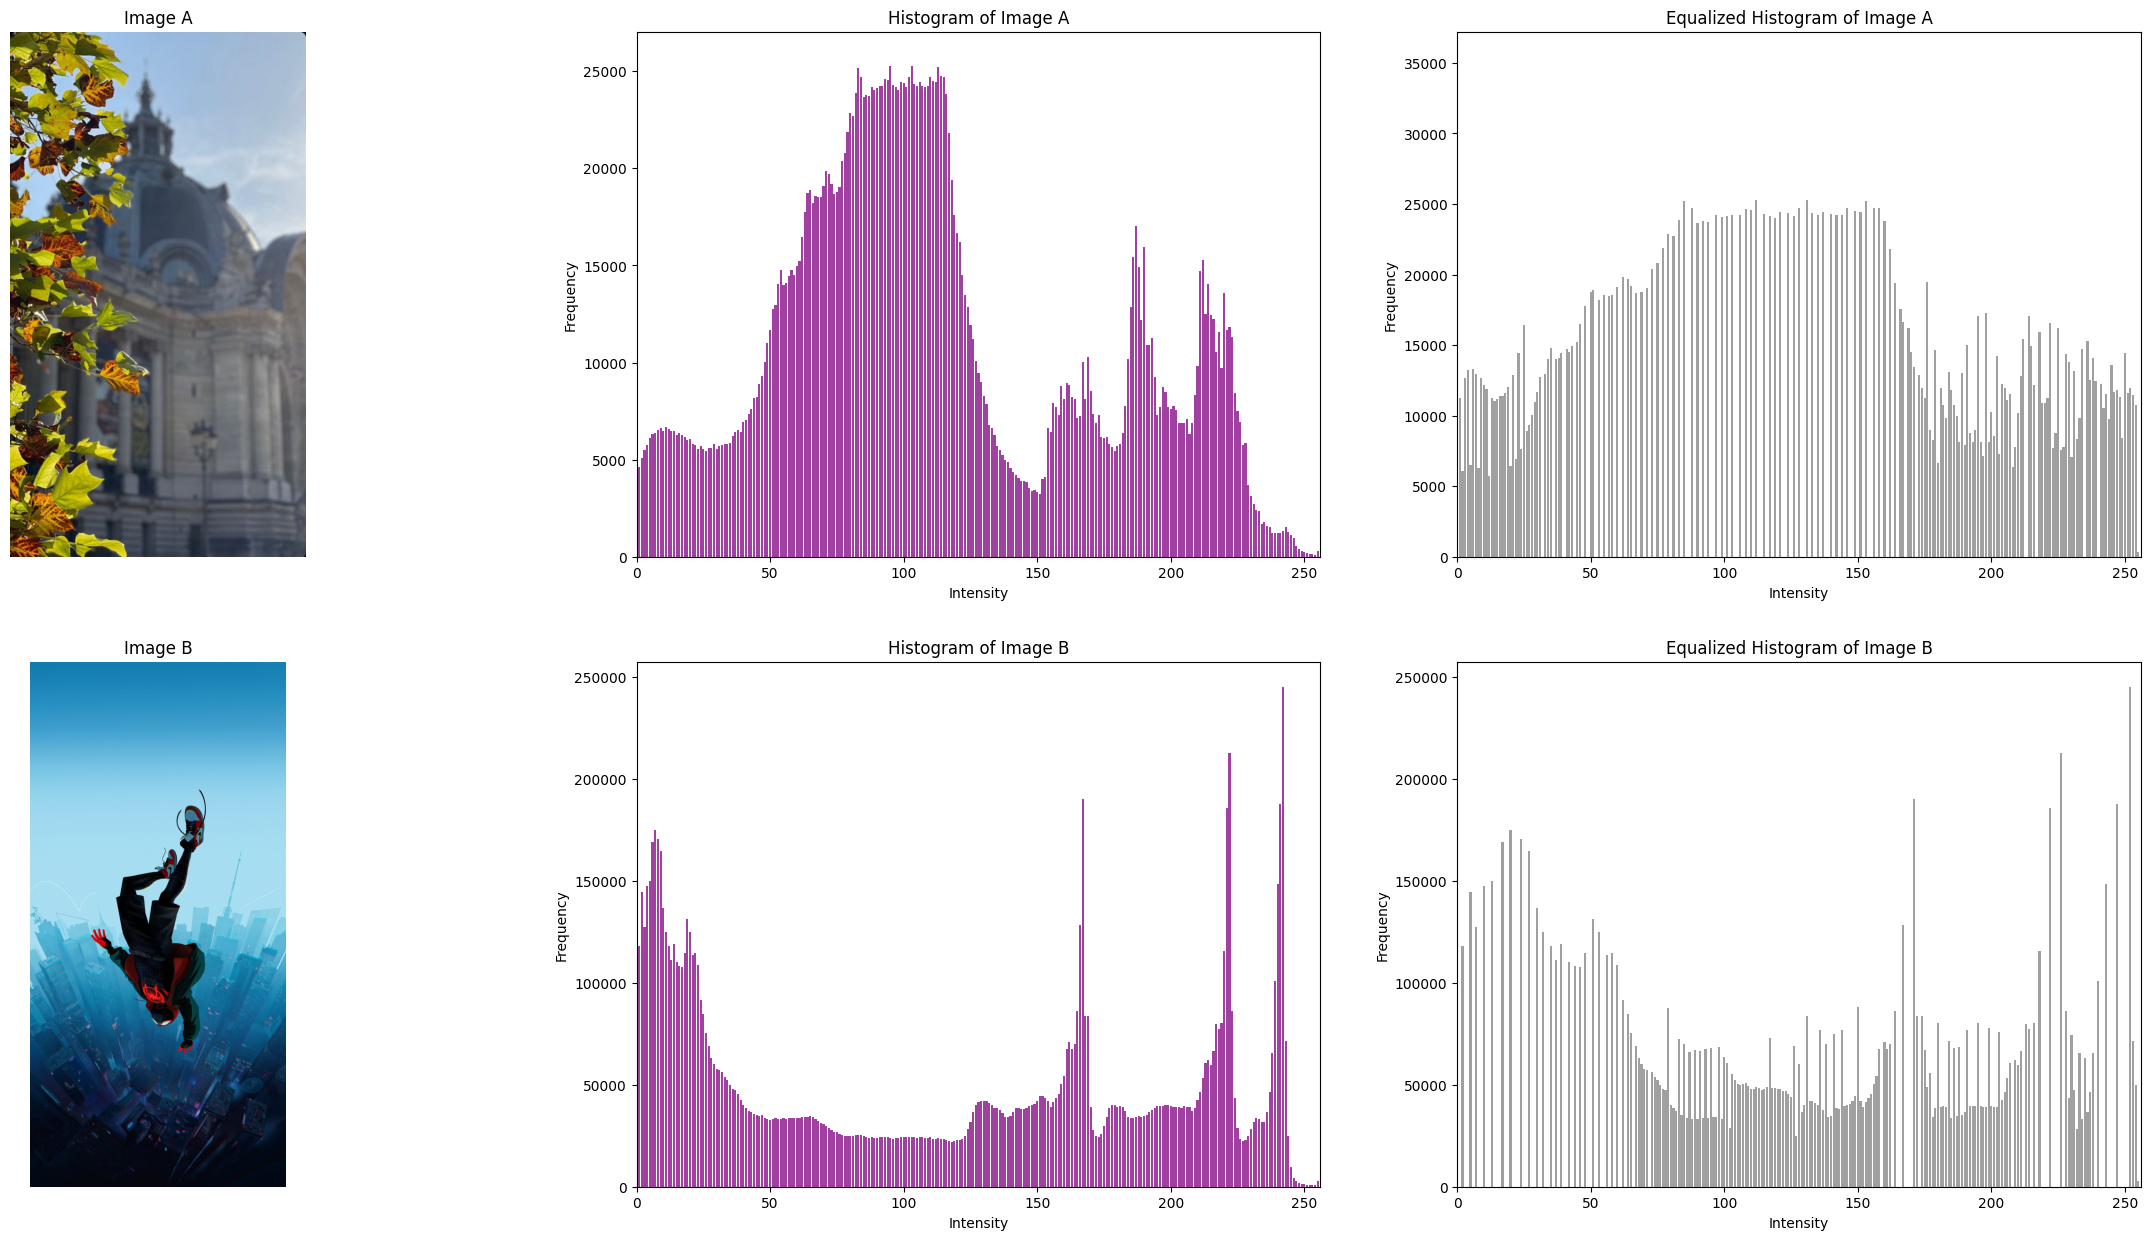

In [9]:
def plot_image_and_histogram(image, title, ax):
    ax[0].imshow(image, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title(f'Image {title}')
    hist, _ = np.histogram(image.flatten(), bins=256, range=(0, 256))
    ax[1].bar(np.arange(256), hist, color='purple', alpha=0.75)
    ax[1].set_title(f'Histogram of Image {title}')
    ax[1].set_xlim([0, 256])
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel('Intensity')
    equalized_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    equalized_image = histequalize(equalized_image)
    equalized_hist, _ = np.histogram(equalized_image.flatten(), bins=256, range=(0, 256))
    ax[2].bar(np.arange(256), equalized_hist, color='grey', alpha=0.75)
    ax[2].set_title(f'Equalized Histogram of Image {title}')
    ax[2].set_xlim([0, 256])
    ax[2].set_ylabel('Frequency')
    ax[2].set_xlabel('Intensity')

A = cv2.cvtColor(cv2.imread('./src_img/image.jpg'), cv2.COLOR_BGR2RGB)
B = cv2.cvtColor(cv2.imread('./src_img/spiderman.png'), cv2.COLOR_BGR2RGB)
fig, axes = plt.subplots(2, 3, figsize=(30, 15))
plot_image_and_histogram(A, 'A', axes[0])
plot_image_and_histogram(B, 'B', axes[1])
plt.show()

**Comments**: This approach provides a clear representation of the image by illustrating the number of pixels with specific intensity values. Histogram equalization, a common technique in image processing, enhances image contrast by redistributing pixel intensities to achieve a more uniform intensity distribution.

However, histogram equalization may not be effective when the image has a highly skewed or disproportionate intensity distribution. In such cases, the technique might produce unsatisfactory results, as it struggles to balance the contrast effectively across regions with varying intensity levels.

**Task 3**

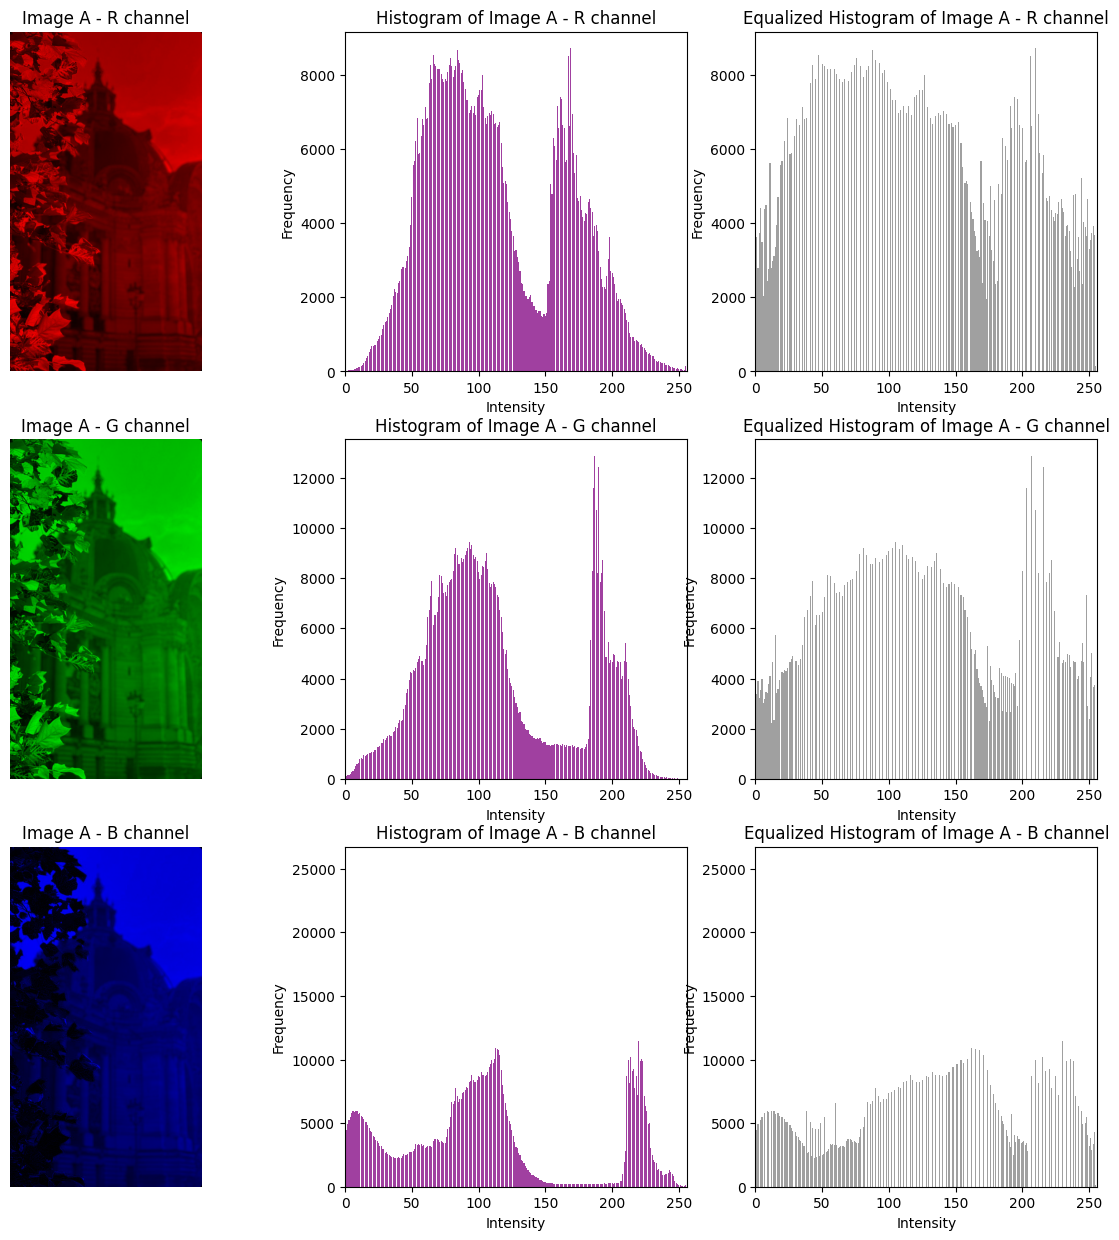

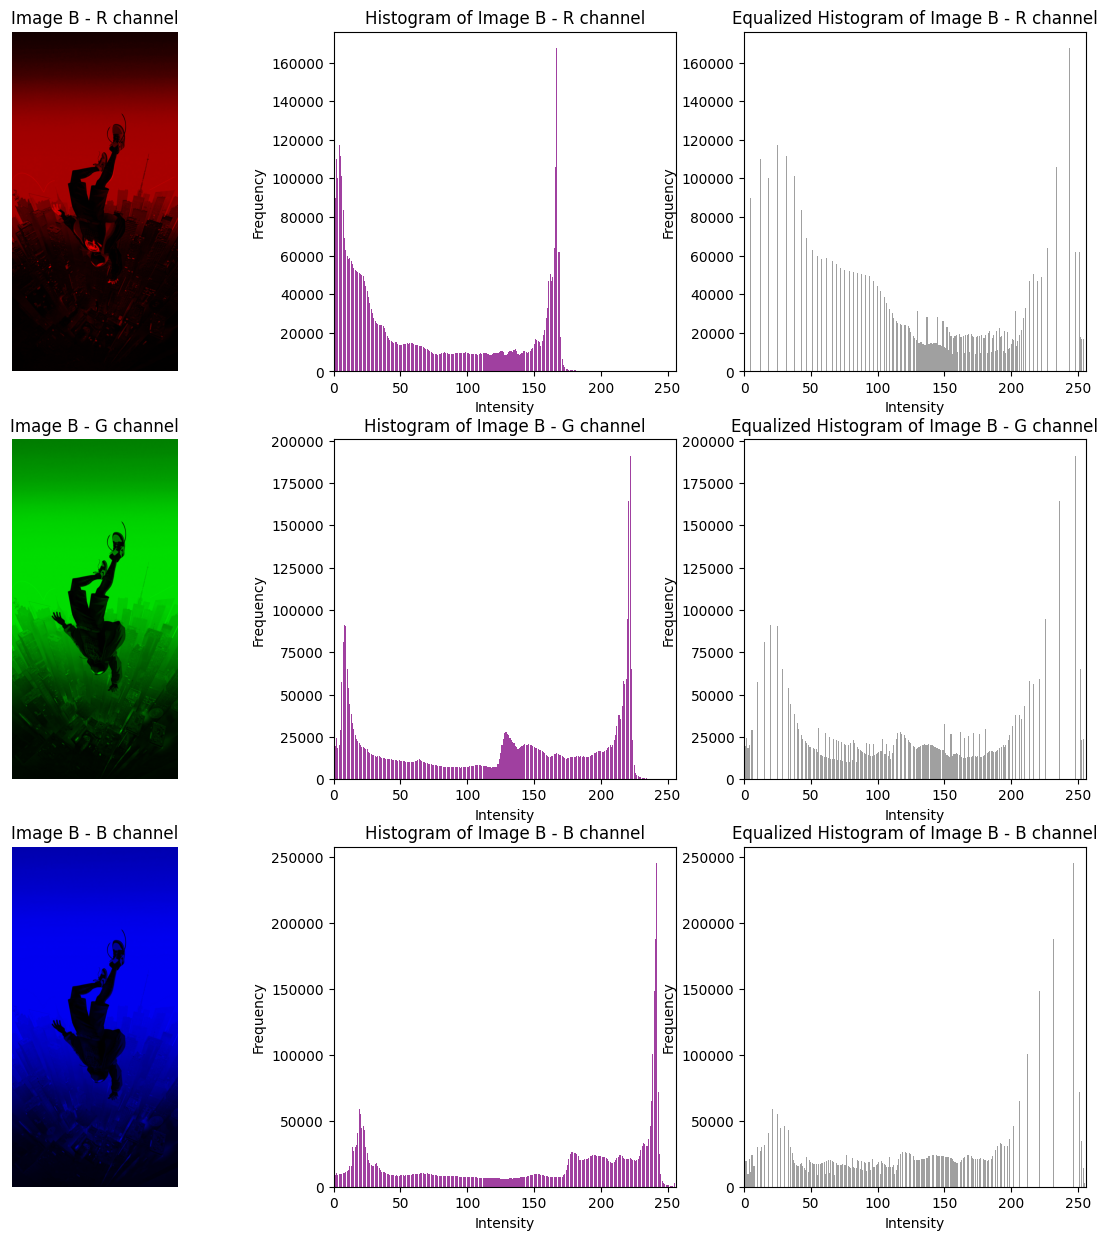

In [10]:
def plot_channel_histograms(image, title, ax, i, color):
    masked_image = image.copy()
    masked_image[:, :, (i - 1) % 3] = 0
    masked_image[:, :, (i + 1) % 3] = 0
    ax[0].imshow(masked_image, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title(f'Image {title} - {color} channel')
    hist, _ = np.histogram(image[:, :, i], bins=256, range=(0, 256))
    ax[1].bar(np.arange(256), hist, color='purple', alpha=0.75)
    ax[1].set_title(f'Histogram of Image {title} - {color} channel')
    ax[1].set_xlim([0, 256])
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel('Intensity')
    equalized_img = histequalize(image[:, :, i])
    equalized_hist, _ = np.histogram(equalized_img.flatten(), bins=256, range=(0, 256))
    ax[2].bar(np.arange(256), equalized_hist, color='grey', alpha=0.75)
    ax[2].set_title(f'Equalized Histogram of Image {title} - {color} channel')
    ax[2].set_xlim([0, 256])
    ax[2].set_ylabel('Frequency')
    ax[2].set_xlabel('Intensity')
for image, title in zip([A, B], ['A', 'B']):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    for i, (color, ax) in enumerate(zip(['R', 'G', 'B'], axes)):
        plot_channel_histograms(image, title, ax, i, color)
plt.show()


**Task 4**

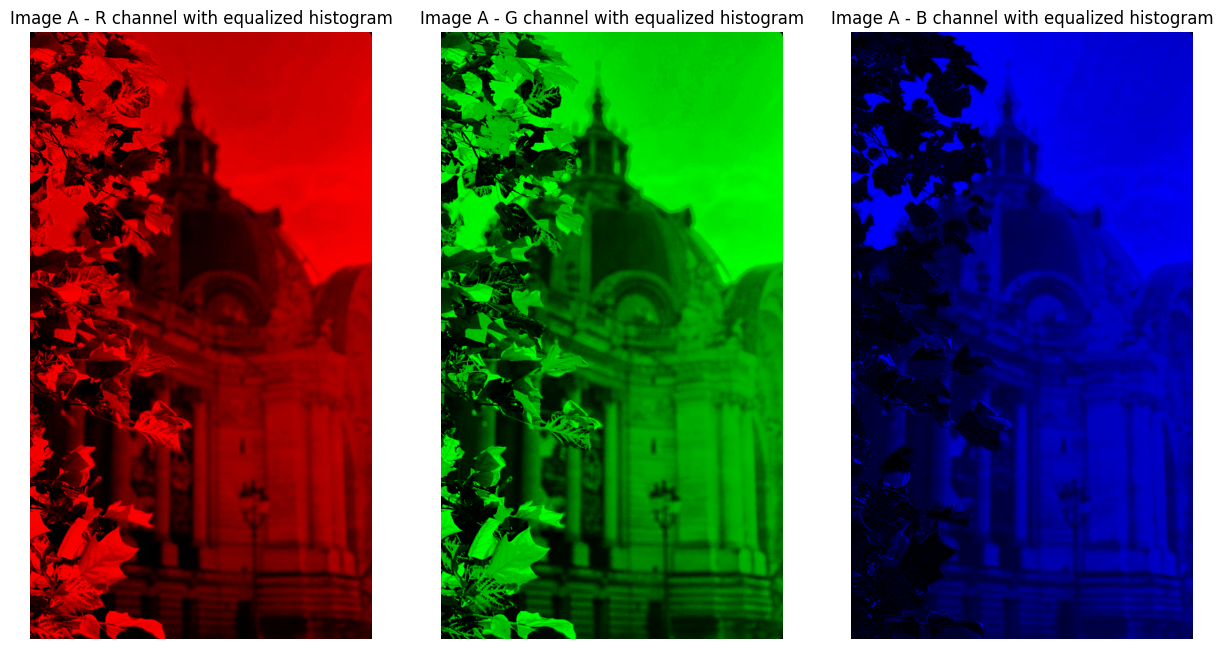

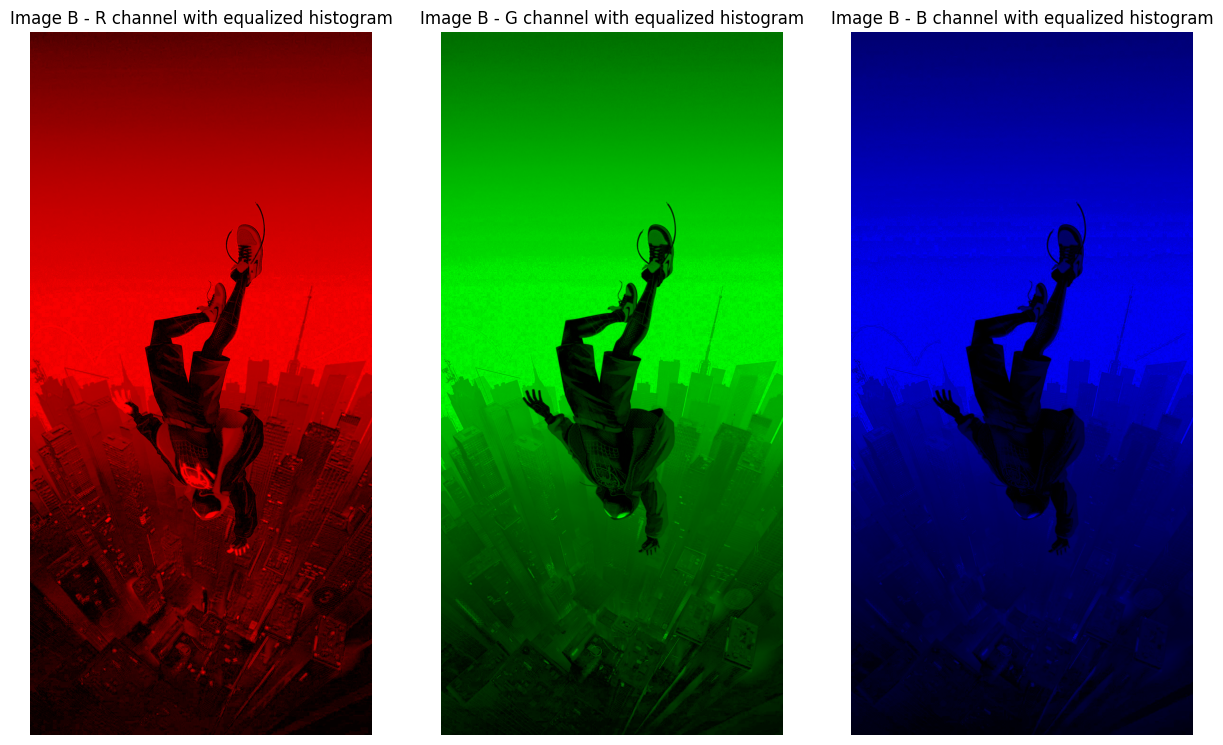

In [11]:
def equalize_channel(image, j):
    hist, _ = np.histogram(image[:, :, j].flatten(), bins=256, range=(0, 256))
    equalized_channel = histequalize(image[:, :, j])
    masked_image = image.copy()
    masked_image[:, :, (j - 1) % 3] = 0
    masked_image[:, :, (j + 1) % 3] = 0
    masked_image[:, :, j] = equalized_channel
    return masked_image

def plot_equalized_images(image, title, ax):
    for j, (color, axis) in enumerate(zip(['R', 'G', 'B'], ax)):
        equalized_image = equalize_channel(image, j)
        axis.imshow(equalized_image, cmap='gray')
        axis.axis('off')
        axis.set_title(f'Image {title} - {color} channel with equalized histogram')
for i, (image, title) in enumerate(zip([A, B], ['A', 'B'])):
    fig, axes = plt.subplots(1, 3, figsize=(15, 15))
    plot_equalized_images(image, title, axes)

plt.show()


**Task 5**

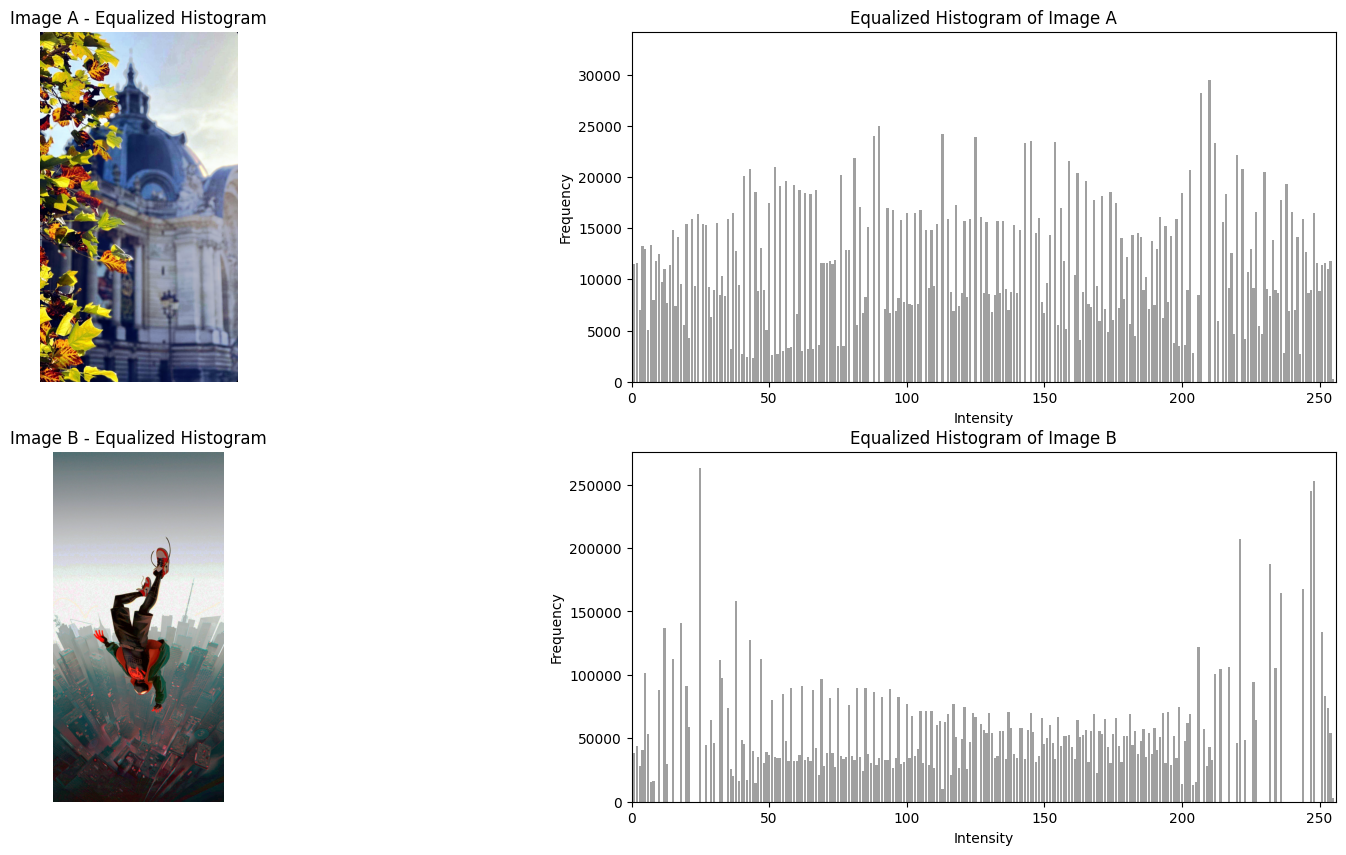

In [12]:
def equalize_image(image):
    equalized_channels = []
    for i in range(3):
        equalized_channel = histequalize(image[:, :, i])
        equalized_channels.append(equalized_channel)
    return np.stack(equalized_channels, axis=-1)
def plot_equalized_image_and_histogram(image, title, ax_img, ax_hist):
    equalized_image = equalize_image(image)
    ax_img.imshow(equalized_image, cmap='gray')
    ax_img.axis('off')
    ax_img.set_title(f'Image {title} - Equalized Histogram')
    equalized_hist, _ = np.histogram(equalized_image.flatten(), bins=256, range=(0, 256))
    ax_hist.bar(np.arange(256), equalized_hist, color='grey', alpha=0.75)
    ax_hist.set_title(f'Equalized Histogram of Image {title}')
    ax_hist.set_xlim([0, 256])
    ax_hist.set_ylabel('Frequency')
    ax_hist.set_xlabel('Intensity')  
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
for i, (image, title) in enumerate(zip([A, B], ['A', 'B'])):
    plot_equalized_image_and_histogram(image, title, axs[i, 0], axs[i, 1])
plt.show()

**Task 6**

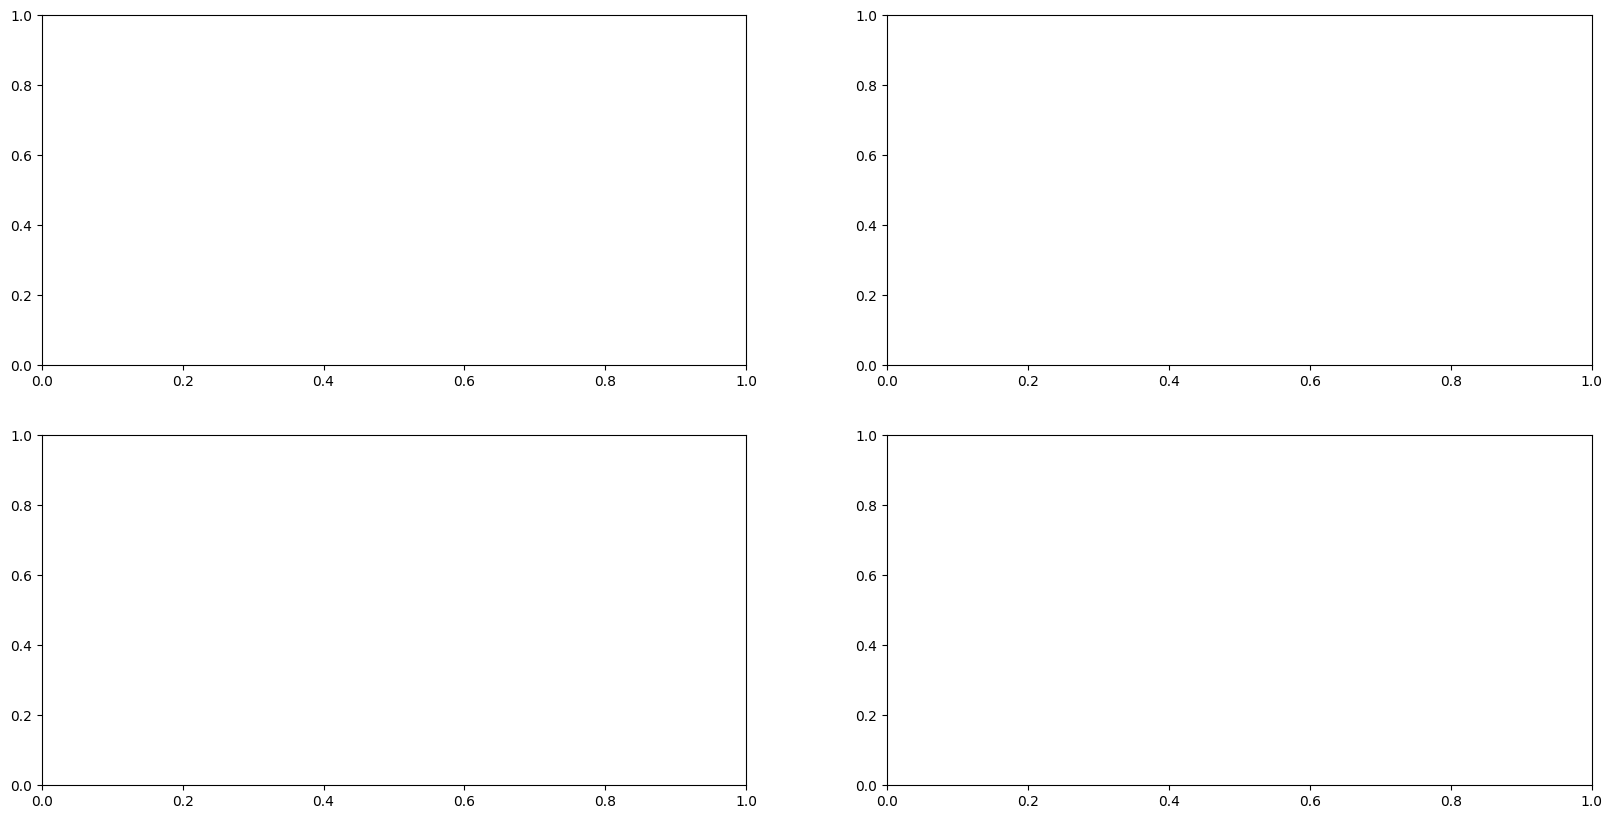

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
for idx, data in enumerate(zip([A, B], ['A', 'B'])):
    image, title = data
    pass

### Q3. Who's the best?

**Task 1**

Dimensions of encrypted image:  (1280, 1672, 3)
Dimensions of decrypted image:  (1280, 1672)


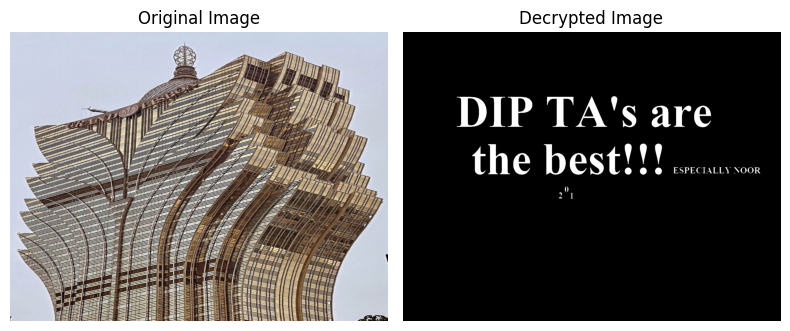

Decrypted image saved to: out_img/q3/decrypted_image.png


In [38]:
img_crypt = cv2.imread("src_img/2_mod.png")

decrypt_image = np.bitwise_and(img_crypt, 1)
decrypt_image = cv2.cvtColor(decrypt_image, cv2.COLOR_BGR2GRAY)

encrypt_dimensions = img_crypt.shape
decrypt_dimensions = decrypt_image.shape
print("Dimensions of encrypted image: ", encrypt_dimensions)
print("Dimensions of decrypted image: ", decrypt_dimensions)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_crypt, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(decrypt_image, cmap='gray')
plt.title('Decrypted Image')
plt.axis('off')

plt.tight_layout()
plt.show()

output_dir = 'out_img/q3'
os.makedirs(output_dir, exist_ok=True)

cv2.imwrite(os.path.join(output_dir, 'decrypted_image.png'), decrypt_image)
print("Decrypted image saved to: out_img/q3/decrypted_image.png")


**Task 2**: DIP TAs (according to the image :')), and Noor(also according to the image :'))

**Task 3**: The cryptic image appeared distorted because resizing was necessary to fit the message image into the base image. This resizing process may have altered the original proportions of the image, leading to the observed distortion.

**Task 4**: The cryptic image was created by a series of bit manipulation functions.The main function is to embed the MSB of the message image into the LSB of the base image. This was done first by right shifting the MSB of the cryptic image by 7 and then masking it with the message image.

**Task 5**

In [34]:
def crypt(message_image, base_image):
    resized_base = cv2.resize(base_image, (message_image.shape[1], message_image.shape[0]))
    message_mask = (message_image & 0x80) >> 7  
    base_cleared = resized_base & 0xFE           
    encrypted_image = base_cleared | message_mask
    return encrypted_image

In [16]:
def decrypt(encrypted_image):
    decrypted_image = encrypted_image.copy()
    LSB_mask = 1 << 0
    decrypted_image = (decrypted_image & LSB_mask) << 7
    return decrypted_image

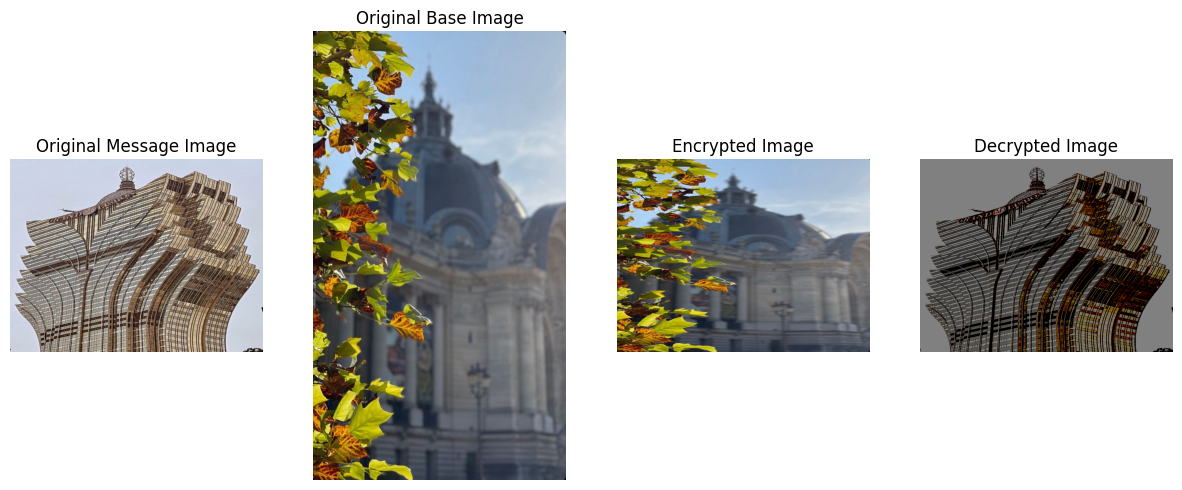

In [39]:
A = cv2.imread('./src_img/2_mod.png', cv2.IMREAD_COLOR)
B = cv2.imread('./src_img/image.jpg', cv2.IMREAD_COLOR)
A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)
B = cv2.cvtColor(B, cv2.COLOR_BGR2RGB)
encrypted_image = crypt(A, B)
decrypted_image = decrypt(encrypted_image)
output_dir = 'out_img/q3'
os.makedirs(output_dir, exist_ok=True)
cv2.imwrite(os.path.join(output_dir, 'q3_5.png'), cv2.cvtColor(encrypted_image, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(output_dir, 'q3_6.png'), cv2.cvtColor(decrypted_image, cv2.COLOR_RGB2BGR))

fig, axs = plt.subplots(1, 4, figsize=(15, 15))
axs[0].imshow(A)
axs[0].axis('off')
axs[0].set_title('Original Message Image')

axs[1].imshow(B)
axs[1].axis('off')
axs[1].set_title('Original Base Image')

axs[2].imshow(encrypted_image)
axs[2].axis('off')
axs[2].set_title('Encrypted Image')

axs[3].imshow(decrypted_image)
axs[3].axis('off')
axs[3].set_title('Decrypted Image')

# Show plot
plt.show()

### Q4. It just doesn’t end, does it

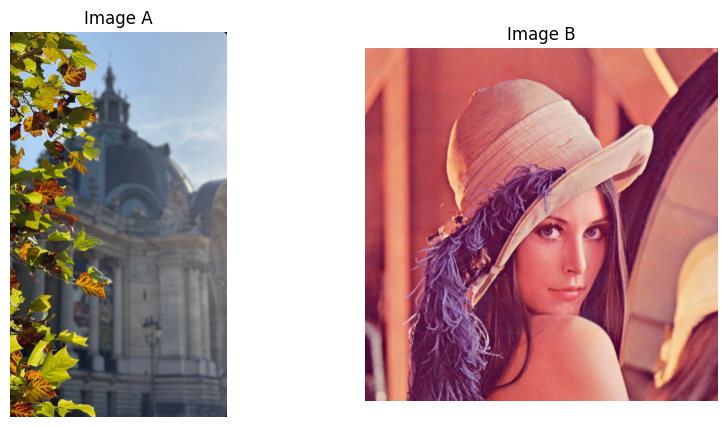

In [4]:
img_A = cv2.imread('src_img/image.jpg')
img_B = cv2.imread('src_img/Lenna.png')
a = 2 
img_A = cv2.cvtColor(img_A, cv2.COLOR_BGR2RGB)
img_B= cv2.cvtColor(img_B, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_A)
axs[0].axis('off')
axs[0].set_title('Image A')

axs[1].imshow(img_B)
axs[1].axis('off')
axs[1].set_title('Image B')

plt.show()


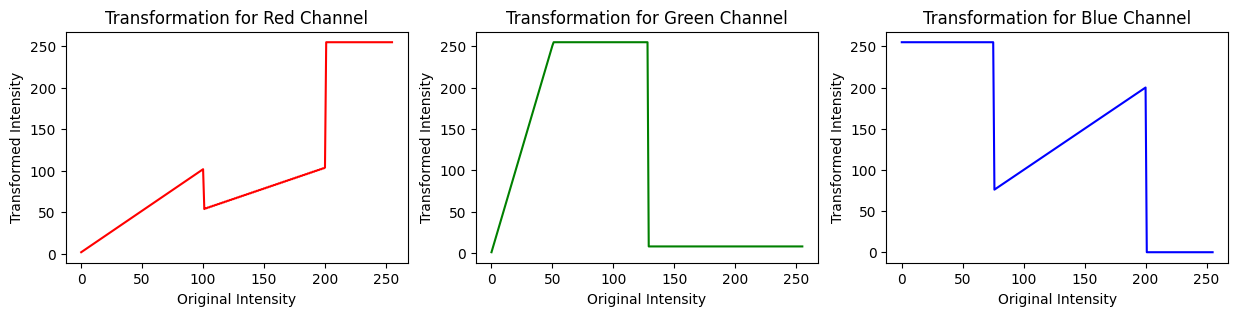

In [5]:
def transform(image):
    red_channel = image[:, :, 0].astype(np.uint32)
    green_channel = image[:, :, 1].astype(np.uint32)
    blue_channel = image[:, :, 2].astype(np.uint32)
    red_channel = transform_red_channel(red_channel)
    green_channel = transform_green_channel(green_channel)
    blue_channel = transform_blue_channel(blue_channel)
    return np.stack([red_channel, green_channel, blue_channel], axis=-1)

def transform_red_channel(red_channel):
    red_channel = red_channel.astype(np.uint32)
    mask1 = red_channel <= 100
    mask2 = (red_channel > 100) & (red_channel <= 200)
    red_channel[mask1] = red_channel[mask1] + a
    red_channel[mask2] = red_channel[mask2] / a + 2 * a
    red_channel[~(mask1 | mask2)] = 255
    np.clip(red_channel, 0, 255, out=red_channel)
    return red_channel.astype(np.uint8)

def transform_green_channel(green_channel):
    green_channel = green_channel.astype(np.uint32)
    mask1 = (green_channel >= 0) & (green_channel <= 128)
    mask2 = green_channel > 128
    green_channel[mask1] = 5 * green_channel[mask1] + 1
    green_channel[mask2] = a / green_channel[mask2] + 8
    np.clip(green_channel, 0, 255, out=green_channel)
    return green_channel.astype(np.uint8)

def transform_blue_channel(blue_channel):
    blue_channel = blue_channel.astype(np.uint32)
    mask1 = (blue_channel >= 0) & (blue_channel <= 75)
    mask2 = (blue_channel > 75) & (blue_channel <= 200)
    mask3 = blue_channel > 200
    blue_channel[mask1] = 255
    blue_channel[mask2] = blue_channel[mask2]
    blue_channel[mask3] = 0
    np.clip(blue_channel, 0, 255, out=blue_channel)
    return blue_channel.astype(np.uint8)


channel = np.array([np.arange(256)])
ax, fig = plt.subplots(1, 3, figsize=(15, 3))

fig[0].plot(channel[0], transform_red_channel(channel)[0], color='red')
fig[0].set_title('Transformation for Red Channel')
fig[0].set_xlabel('Original Intensity')
fig[0].set_ylabel('Transformed Intensity')

fig[1].plot(channel[0], transform_green_channel(channel)[0], color='green')
fig[1].set_title('Transformation for Green Channel')
fig[1].set_xlabel('Original Intensity')
fig[1].set_ylabel('Transformed Intensity')

fig[2].plot(channel[0], transform_blue_channel(channel)[0], color='blue')
fig[2].set_title('Transformation for Blue Channel')
fig[2].set_xlabel('Original Intensity')
fig[2].set_ylabel('Transformed Intensity')

plt.show()

**Task 1**

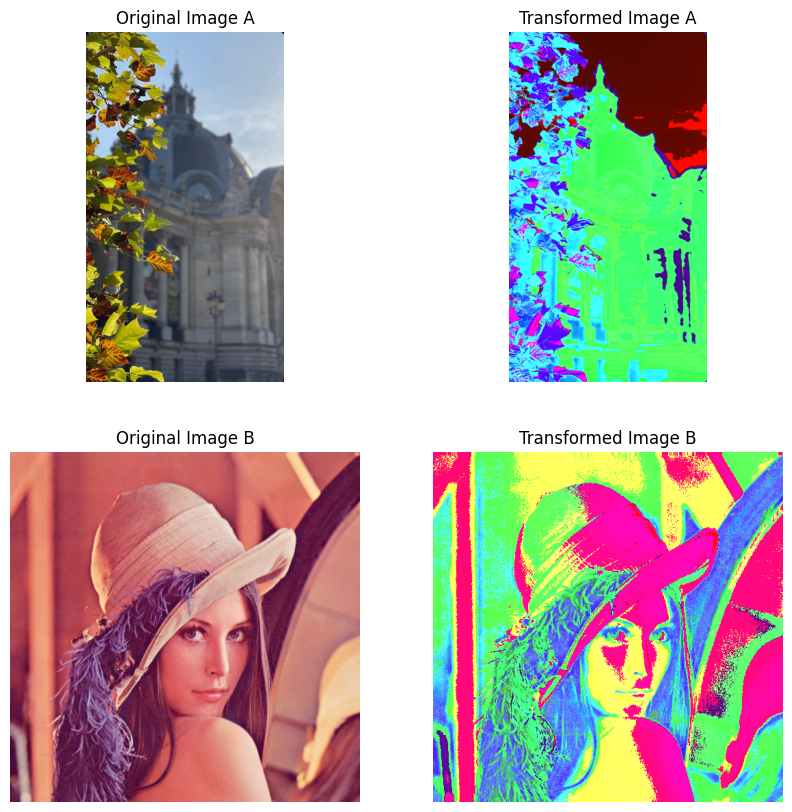

Transformed images saved to: out_img/q4


In [6]:

output_dir = 'out_img/q4'
os.makedirs(output_dir, exist_ok=True)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
images = [img_A, img_B]
titles = ['A', 'B']

for i in range(2):
    image = images[i]
    title = titles[i]
    transformed_image = transform(image)

    axs[i, 0].imshow(image)
    axs[i, 0].axis('off')
    axs[i, 0].set_title(f'Original Image {title}')
    
    axs[i, 1].imshow(transformed_image, cmap='gray') 
    axs[i, 1].axis('off')
    axs[i, 1].set_title(f'Transformed Image {title}')
    
    filename_transformed = os.path.join(output_dir, f'q4_1_{i+1}.png')
    cv2.imwrite(filename_transformed, cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))  # Convert RGB to BGR for saving

plt.show()

print(f"Transformed images saved to: {output_dir}")


**Task 2**

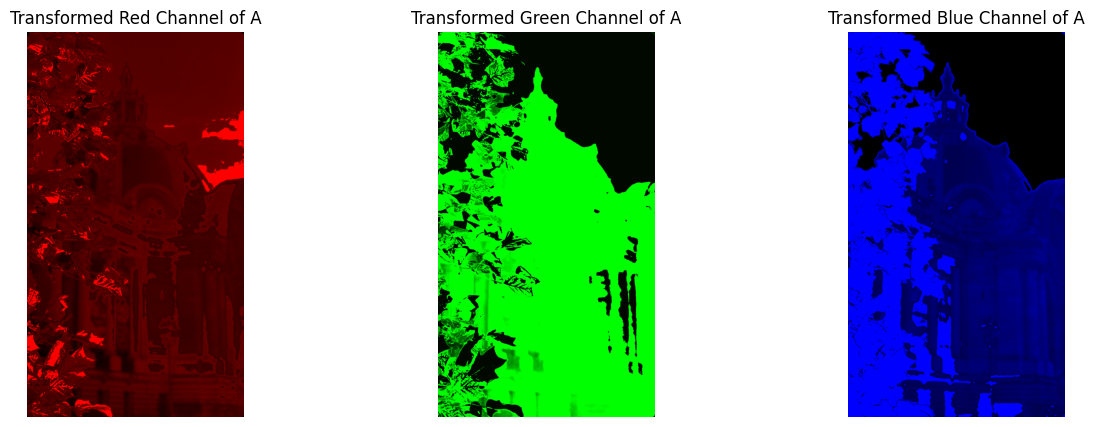

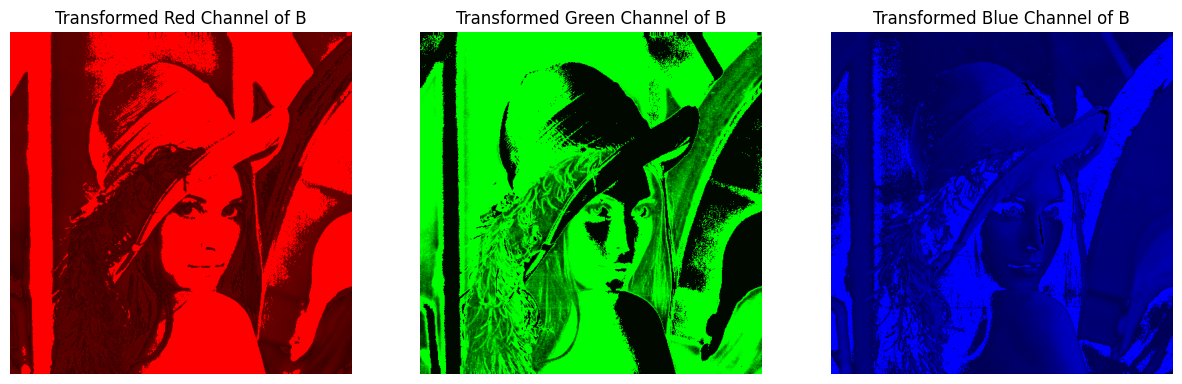

In [7]:
def plot_transformed_channels(images, titles):
    num_images = len(images)
    for i in range(num_images):
        image = images[i]
        title = titles[i]
        red_channel = image[:, :, 0].astype(np.uint32)
        green_channel = image[:, :, 1].astype(np.uint32)
        blue_channel = image[:, :, 2].astype(np.uint32)
        zero_channel = np.zeros(image.shape[:2], dtype=np.uint32)
        transformed_red_channel = transform_red_channel(red_channel)
        transformed_green_channel = transform_green_channel(green_channel)
        transformed_blue_channel = transform_blue_channel(blue_channel)
        red_image = np.stack([transformed_red_channel, zero_channel, zero_channel], axis=-1)
        green_image = np.stack([zero_channel, transformed_green_channel, zero_channel], axis=-1)
        blue_image = np.stack([zero_channel, zero_channel, transformed_blue_channel], axis=-1)
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(red_image)
        axs[0].axis('off')
        axs[0].set_title(f'Transformed Red Channel of {title}')

        axs[1].imshow(green_image)
        axs[1].axis('off')
        axs[1].set_title(f'Transformed Green Channel of {title}')

        axs[2].imshow(blue_image)
        axs[2].axis('off')
        axs[2].set_title(f'Transformed Blue Channel of {title}')

        plt.show()
plot_transformed_channels([img_A, img_B], ['A', 'B'])


**Task 3**

Red Channel - Image A:
  Line of best fit: y = 1.1000x + -18.2191

Green Channel - Image A:
  Line of best fit: y = -1.6635x + 361.1444

Blue Channel - Image A:
  Line of best fit: y = -0.6064x + 225.6138



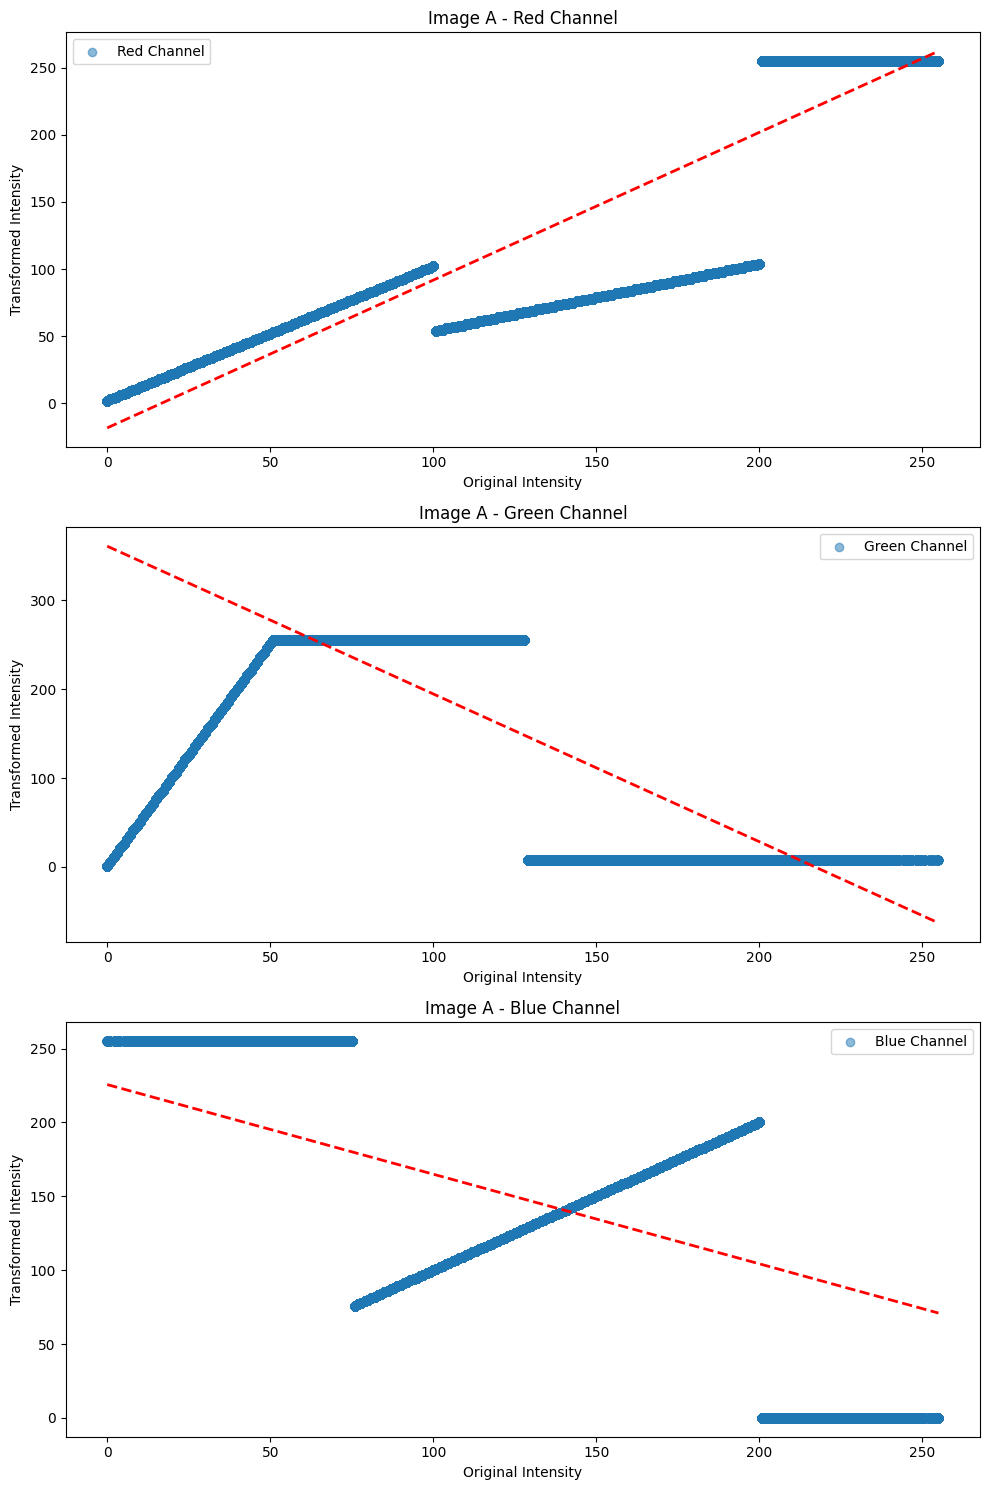

Red Channel - Image B:
  Line of best fit: y = 0.1320x + 61.6074

Green Channel - Image B:
  Line of best fit: y = -1.0215x + 258.0533

Blue Channel - Image B:
  Line of best fit: y = -0.8586x + 232.1284



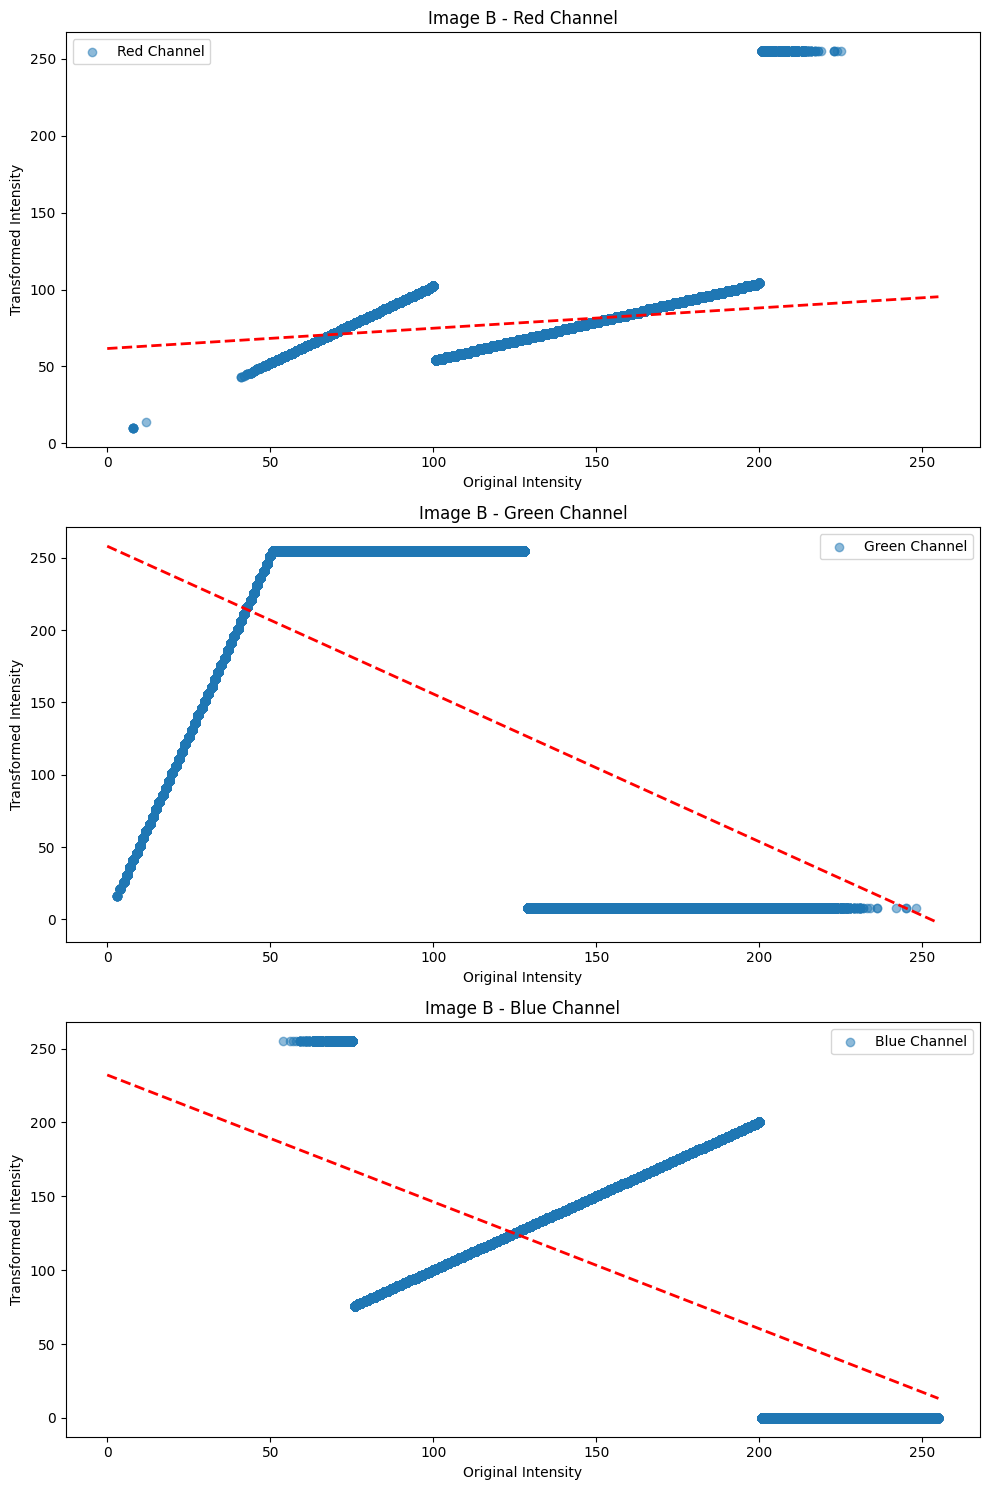

Equations for Image A: {'Red': (1.0999672751125005, -18.21914831373922), 'Green': (-1.66351869804951, 361.1444085425689), 'Blue': (-0.6064417515800875, 225.61381342066932)}
Equations for Image B: {'Red': (0.13203727342306004, 61.60740377802707), 'Green': (-1.0214816067082255, 258.0533163781541), 'Blue': (-0.8586252592904571, 232.12844792341707)}


In [8]:
def plot_intensity_comparison(original_image, transformed_image, title_prefix):
    channels = ['Red', 'Green', 'Blue']
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    equations = {}
    for i, channel in enumerate(channels):
        orig_channel = original_image[:, :, i].ravel()
        trans_channel = transformed_image[:, :, i].ravel()
        axs[i].scatter(orig_channel, trans_channel, alpha=0.5, label=f'{channel} Channel')
        
        A = np.vstack([orig_channel, np.ones(len(orig_channel))]).T
        m, c = np.linalg.lstsq(A, trans_channel, rcond=None)[0]
        
        line_x = np.linspace(0, 255, 100)
        line_y = m * line_x + c
        axs[i].plot(line_x, line_y, color='red', linestyle='--', linewidth=2)
        axs[i].set_xlabel('Original Intensity')
        axs[i].set_ylabel('Transformed Intensity')
        axs[i].set_title(f'{title_prefix} - {channel} Channel')
        axs[i].legend()
        

        equations[channel] = (m, c)
        print(f'{channel} Channel - {title_prefix}:\n  Line of best fit: y = {m:.4f}x + {c:.4f}\n')
        
    plt.tight_layout()
    plt.show()
    return equations

A_1 = cv2.cvtColor(img_A, cv2.COLOR_BGR2RGB)
B_1 = cv2.cvtColor(img_B, cv2.COLOR_BGR2RGB)
transformed_A = transform(A)
transformed_B = transform(B)
equations_A = plot_intensity_comparison(A, transformed_A, 'Image A')
equations_B = plot_intensity_comparison(B, transformed_B, 'Image B')
print("Equations for Image A:", equations_A)
print("Equations for Image B:", equations_B)

**Observation:** The line of best fit represents a line that minimizes the total distance from all data points in a graph, providing a smooth approximation of the underlying trend in the data. It is typically used to understand the general direction or pattern of data points.

However, as the given data is piecewise, non-differentiable, and discontinuous at various points, the application of a line of best fit can be challenging. In such cases:

- **Piecewise Data:** The data is divided into segments, each of which may follow a different trend. A single line of best fit might not accurately capture the variations in each segment, leading to a poor representation of the overall data pattern.
  
- **Non-Differentiable Data:** Data that lacks a smooth transition between points can be difficult for a line of best fit to handle, as the line might struggle to align with abrupt changes or jumps in the data.

- **Discontinuities:** When data has abrupt breaks or gaps, the line of best fit may not adequately address these discontinuities, resulting in a misleading or inaccurate approximation of the data trend.

In summary, while the line of best fit is useful for capturing trends in continuous and smooth data, its effectiveness diminishes when applied to data that is piecewise, non-differentiable, or discontinuous. In such situations, alternative methods or piecewise fitting techniques might be required to better represent the data’s characteristics.

**Task 4**

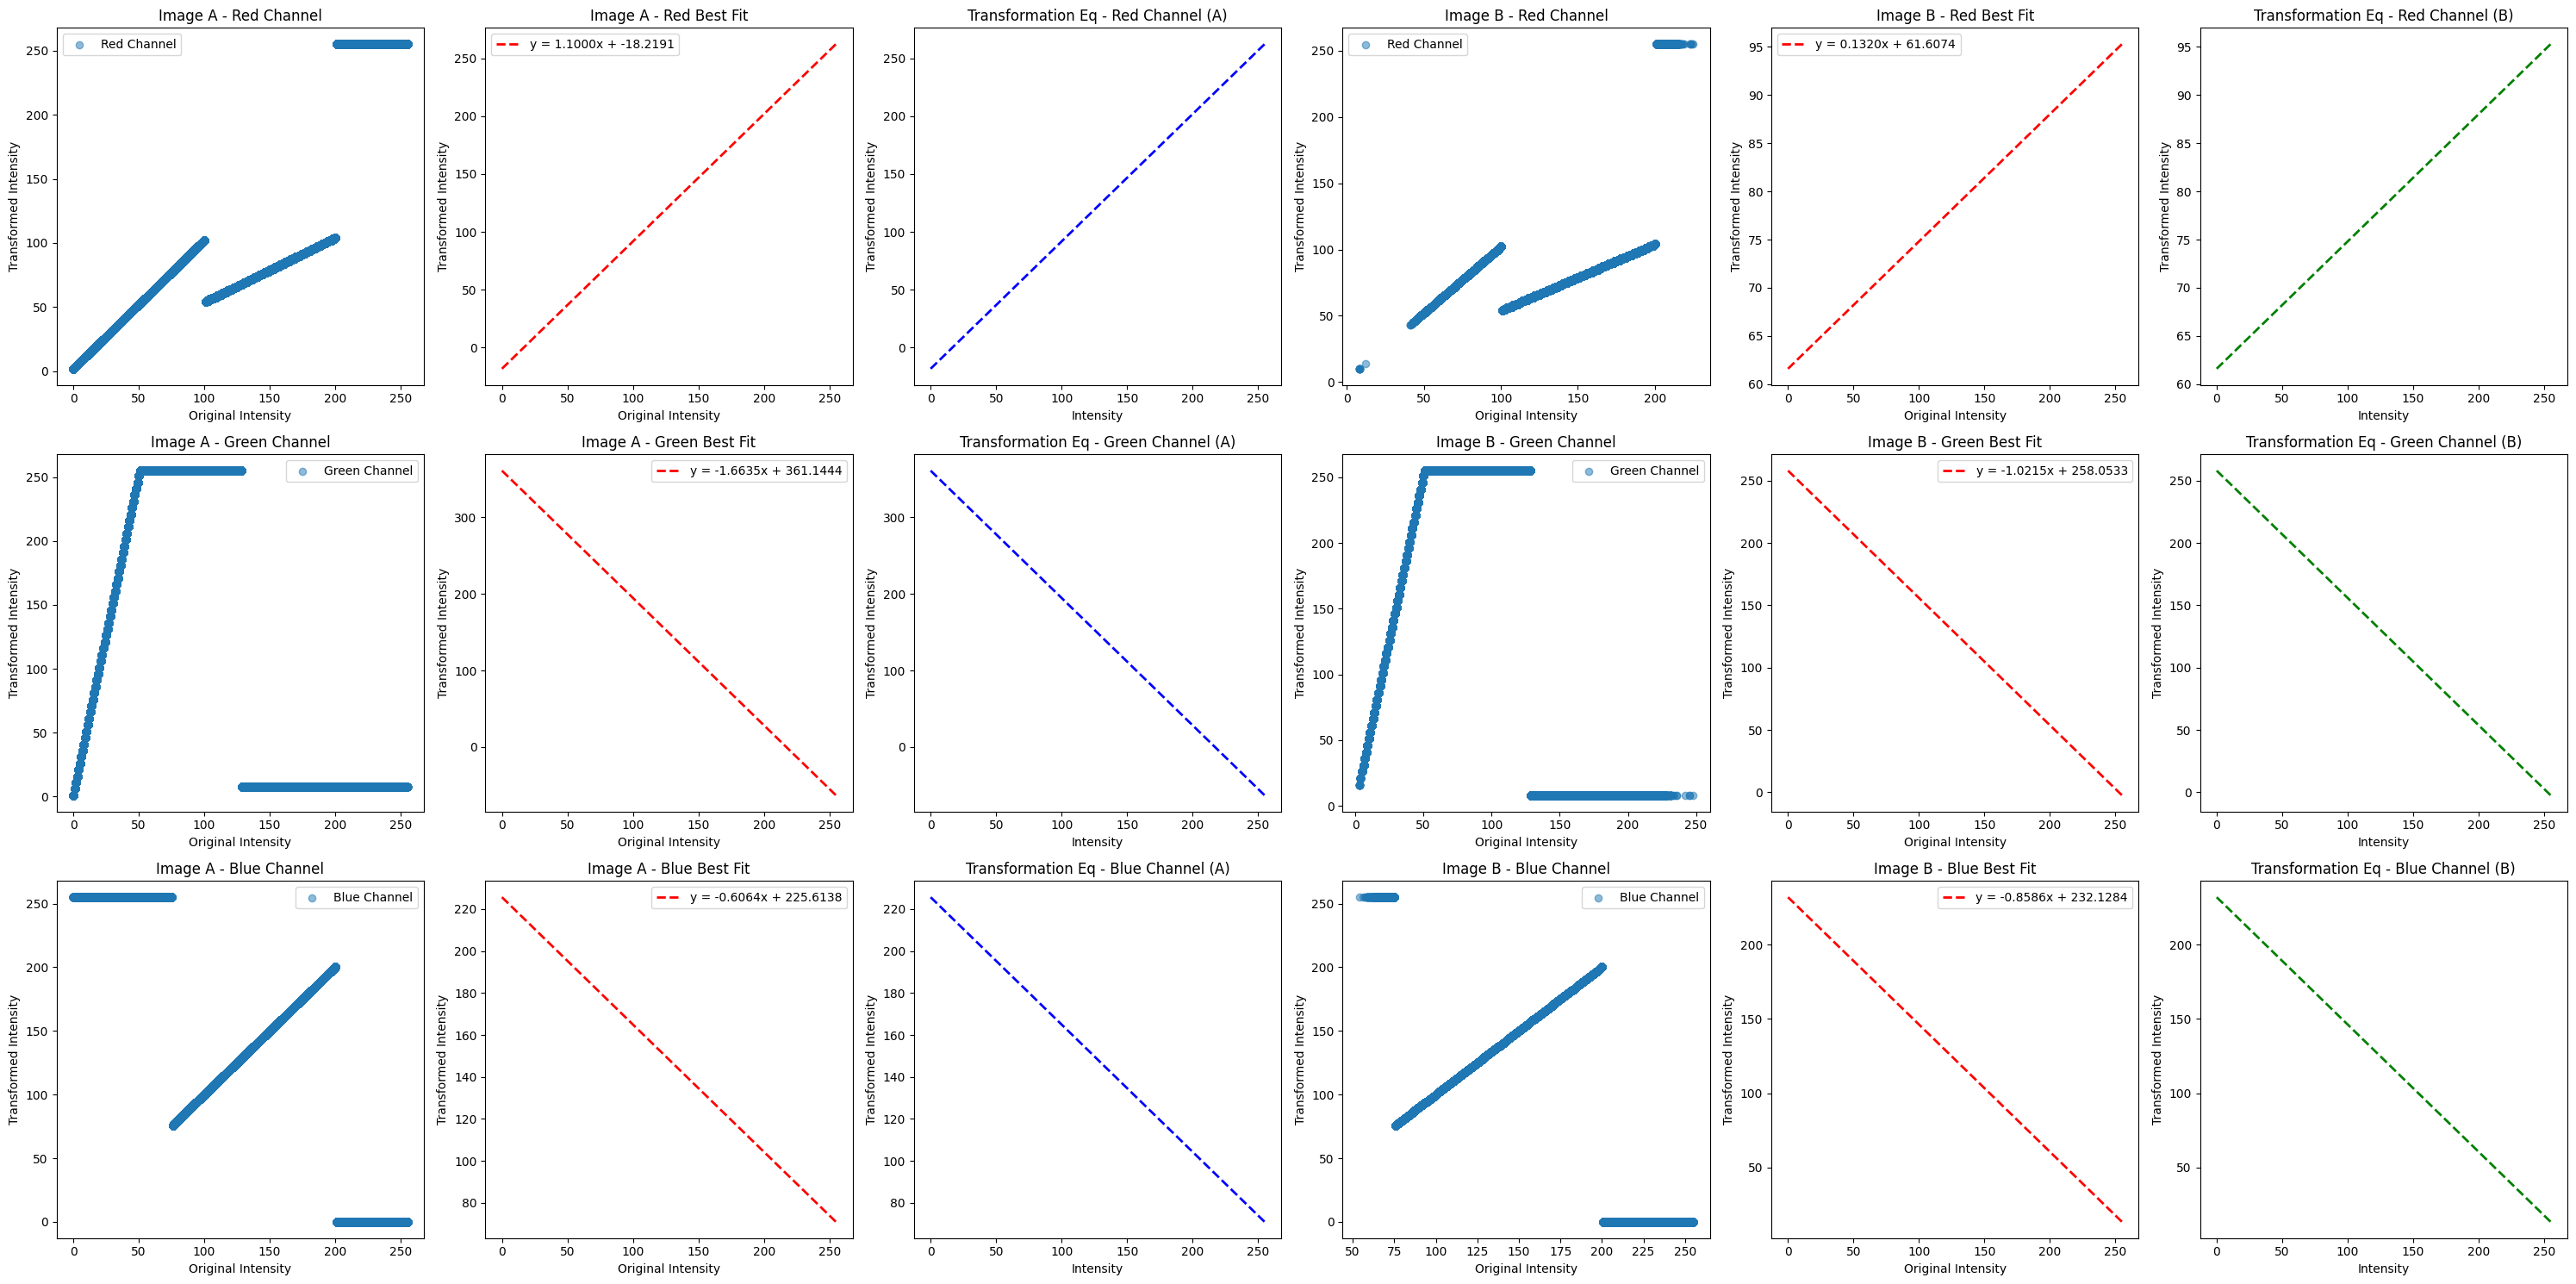

In [9]:
def plot_combined_intensity_comparison(original_image_A, transformed_image_A, original_image_B, transformed_image_B):
    channels = ['Red', 'Green', 'Blue']
    fig, axs = plt.subplots(3, 6, figsize=(30, 15))
    def plot_intensity_comparison(axs, original_image, transformed_image, col_offset, title_prefix):
        equations = {}
        for i, channel in enumerate(channels):
            orig_channel = original_image[:, :, i].ravel()
            trans_channel = transformed_image[:, :, i].ravel()
            axs[i, col_offset].scatter(orig_channel, trans_channel, alpha=0.5, label=f'{channel} Channel')
            axs[i, col_offset].set_xlabel('Original Intensity')
            axs[i, col_offset].set_ylabel('Transformed Intensity')
            axs[i, col_offset].set_title(f'{title_prefix} - {channel} Channel')
            axs[i, col_offset].legend()
            A = np.vstack([orig_channel, np.ones(len(orig_channel))]).T
            m, c = np.linalg.lstsq(A, trans_channel, rcond=None)[0]
            line_x = np.linspace(0, 255, 100)
            line_y = m * line_x + c
            axs[i, col_offset+1].plot(line_x, line_y, color='red', linestyle='--', linewidth=2)
            axs[i, col_offset+1].set_xlabel('Original Intensity')
            axs[i, col_offset+1].set_ylabel('Transformed Intensity')
            axs[i, col_offset+1].set_title(f'{title_prefix} - {channel} Best Fit')
            equation = f'y = {m:.4f}x + {c:.4f}'
            equations[channel] = (m, c)
            axs[i, col_offset+1].legend([equation])
        return equations

    equations_A = plot_intensity_comparison(axs, original_image_A, transformed_image_A, 0, 'Image A')
    equations_B = plot_intensity_comparison(axs, original_image_B, transformed_image_B, 3, 'Image B')

    for i, channel in enumerate(channels):
        m_A, c_A = equations_A[channel]
        m_B, c_B = equations_B[channel]
        trans_eq_x = np.linspace(0, 255, 100)
        trans_eq_y_A = m_A * trans_eq_x + c_A
        trans_eq_y_B = m_B * trans_eq_x + c_B
        axs[i, 2].plot(trans_eq_x, trans_eq_y_A, color='blue', linestyle='--', linewidth=2)
        axs[i, 2].set_xlabel('Intensity')
        axs[i, 2].set_ylabel('Transformed Intensity')
        axs[i, 2].set_title(f'Transformation Eq - {channel} Channel (A)')
        axs[i, 5].plot(trans_eq_x, trans_eq_y_B, color='green', linestyle='--', linewidth=2)
        axs[i, 5].set_xlabel('Intensity')
        axs[i, 5].set_ylabel('Transformed Intensity')
        axs[i, 5].set_title(f'Transformation Eq - {channel} Channel (B)')

    plt.tight_layout()
    plt.show()

transformed_A = transform(A_1)
transformed_B = transform(B_1)

plot_combined_intensity_comparison(A, transformed_A, B, transformed_B)

**Task 5**

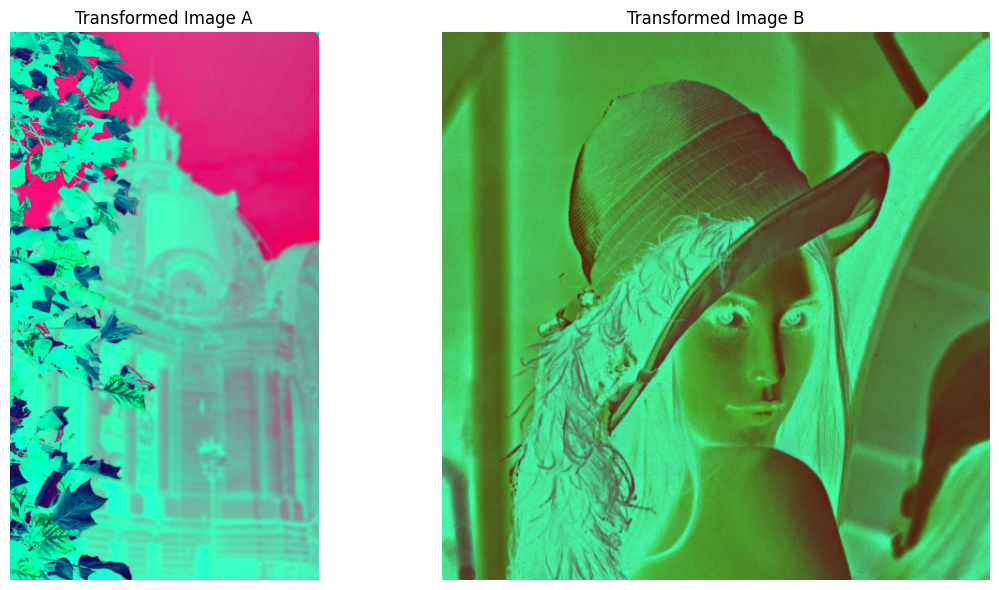

Transformed images saved to: out_img/q4


In [10]:
def modTrans(image, equations):
    transformed_image = np.zeros_like(image, dtype=np.uint8)
    
    m_r, c_r = equations['Red']
    m_g, c_g = equations['Green']
    m_b, c_b = equations['Blue']

    transformed_image[:, :, 0] = np.clip(m_r * image[:, :, 0] + c_r, 0, 255)
    transformed_image[:, :, 1] = np.clip(m_g * image[:, :, 1] + c_g, 0, 255)
    transformed_image[:, :, 2] = np.clip(m_b * image[:, :, 2] + c_b, 0, 255)
    
    return transformed_image.astype(np.uint8)


mod_transA = modTrans(A_1, equations_A)
mod_transB = modTrans(B_1, equations_B)

output_dir = 'out_img/q4'
os.makedirs(output_dir, exist_ok=True)

cv2.imwrite(os.path.join(output_dir, 'mod_trans_A.png'), cv2.cvtColor(mod_transA, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(output_dir, 'mod_trans_B.png'), cv2.cvtColor(mod_transB, cv2.COLOR_RGB2BGR))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(mod_transA)
plt.title('Transformed Image A')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mod_transB)
plt.title('Transformed Image B')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Transformed images saved to: out_img/q4")


**Task 6**

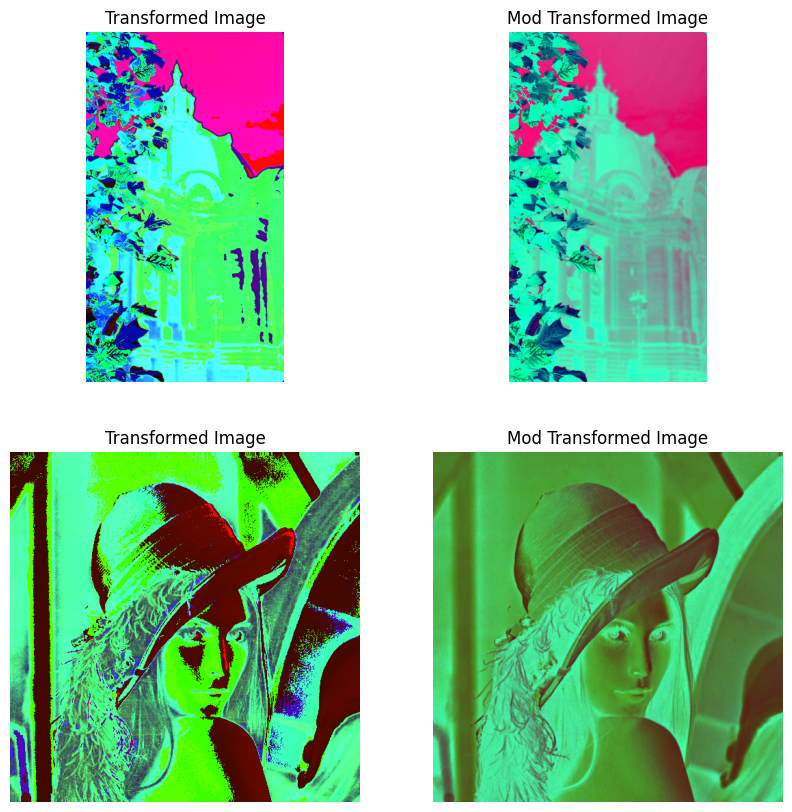

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
images = [transformed_A, transformed_B]
original_images=[A_1,B_1]
equations=[equations_A,equations_B]
for i in range(2):
    image = images[i]
    origin=original_images[i]
    equation=equations[i]
    transformed_image = modTrans(origin,equation)
    axs[i, 0].imshow(image)
    axs[i, 0].axis('off')
    axs[i, 0].set_title(f'Transformed Image')
    axs[i, 1].imshow(transformed_image)
    axs[i, 1].axis('off')
    axs[i, 1].set_title(f'Mod Transformed Image')
plt.show()

**Task 7**

**Observation and Conclusion**: A notable difference between the transformed image and the mod-transformed image is the level of noise. The transformed image exhibits higher noise levels, whereas the mod-transformed image shows improved feature clarity.

This improvement in the mod-transformed image is due to the line of best fit calculation, which effectively reduces noise and highlights features more prominently. By using the least squares method, we average out deviations and align points along a single line. This averaging process helps to smooth out noise and enhance the detail in the image.

Thus, we can consider this transformation as a type of filter. It reduces noise and accentuates important features, functioning similarly to how a filter would improve image quality by focusing on significant elements and minimizing unwanted variations.